In [1]:
# comment
from ipywidgets import widgets
import matplotlib.pyplot as plt
from IPython.display import display
import requests
import json

In [2]:
# get data for the graphs
data = requests.get('http://hainco-sb.herokuapp.com/api/product/frequency')
data = data.json()

frequently_bought = data.get('frequentlyBought')
not_frequently_bought = data.get('notFrequentlyBought')

consumable_freq = []
consumable_not_freq = []

# transform data to consumable in plt
for product in frequently_bought:
    parsed = {
        'count': product.get('_count').get('order_product_code'),
        'product': product.get('order_product_code')
    }
    consumable_freq.append(parsed)
    
for product in not_frequently_bought:
    parsed = {
        'count': product.get('_count').get('order_product_code'),
        'product': product.get('order_product_code')
    }
    consumable_not_freq.append(parsed)

## Products bought mostly (Bar Graph)
This section shows the products mostly bought by the customers

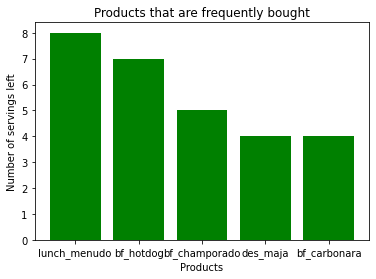

In [3]:
# counter for the bars 
count = 0

# x-coordinates of left sides of bars 
left = []
  
# heights of bars
height = []
  
# labels for bars
tick_label = []

for product in consumable_freq:
    count += 1
    left.append(count)
    height.append(product.get('count'))
    tick_label.append(product.get('product'))
  
# plotting a bar chart
plt.bar(left, height, bottom = 0, tick_label = tick_label,
        width = 0.8, color = ['green'])
  
# naming the x-axis
plt.xlabel('Products')
# naming the y-axis
plt.ylabel('Number of servings left')
# plot title
plt.title('Products that are frequently bought')
  
# function to show the plot
plt.show()

## Products that are not usually bought

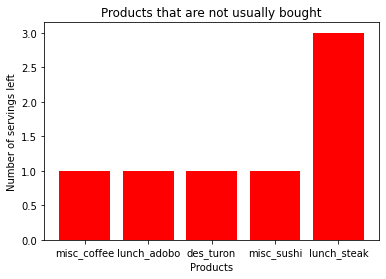

In [4]:
# counter for the bars 
count = 0 
    
# x-coordinates of left sides of bars 
left = []
  
# heights of bars
height = []
  
# labels for bars
tick_label = []

for product in consumable_not_freq:
    count += 1
    left.append(count)
    height.append(product.get('count'))
    tick_label.append(product.get('product'))
  
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red'])
  
# naming the x-axis
plt.xlabel('Products')
# naming the y-axis
plt.ylabel('Number of servings left')
# plot title
plt.title('Products that are not usually bought')
  
# function to show the plot
plt.show()

## Earnings vs Actual Profit (Pie Graph) [Weekly]
This report shows the ratio or percentage of the actual profit deducting the costs of ingredients, and other categories

In [5]:
revenue_data = requests.get('http://hainco-sb.herokuapp.com/api/order/revenue')
weekly_revenue = revenue_data.json().get('weeklyRevenue')

In [6]:
#comment
def generate_profit_graph(self):
    categories = ['Profit', 'Cost of Ingredients', 'Delivery Costs', 'Other Costs']

    weekly_earning = float(weekly_revenue)
    ingredient_costs = ingredients.value
    delivery_costs = delivery.value
    other_costs = other.value

    values = [
        weekly_earning - ingredient_costs - delivery_costs - other_costs,
        ingredient_costs,
        delivery_costs,
        other_costs
    ]

    colors = ['g', 'r', 'y', 'b']

    plt.figure(figsize=(5, 2.7), layout='constrained')

    plt.pie(
        values,
        labels=categories,
        colors=colors,
        startangle=90,
        autopct='%1.0f%%',
        explode=(0.1,0,0,0),
        shadow=True
    )

    plt.title('Breakdown of Actual Profit vs Costs')

    plt.show()


weekly = widgets.FloatText(
    description='Weekly',
    disabled=True,
    value=weekly_revenue
)
ingredients = widgets.FloatText(
    description='Ingredient'
)
delivery = widgets.FloatText(
    description='Delivery'
)
other = widgets.FloatText(
    description='Other Costs'
)

generate_button = widgets.Button(
    description='Generate',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Generate Profit Breakdown',
    icon='check'
)

generate_button.on_click(generate_profit_graph)

display(weekly, ingredients, delivery, other, generate_button)

FloatText(value=325.0, description='Weekly', disabled=True)

FloatText(value=0.0, description='Ingredient')

FloatText(value=0.0, description='Delivery')

FloatText(value=0.0, description='Other Costs')

Button(description='Generate', icon='check', style=ButtonStyle(), tooltip='Generate Profit Breakdown')

## Total Earnings vs Actual Profit (Pie Graph) [Weekly]

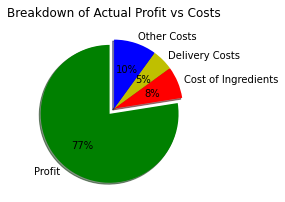

In [7]:
categories = ['Profit', 'Cost of Ingredients', 'Delivery Costs', 'Other Costs']

weekly_earning = 20000
ingredient_costs = 1500
delivery_costs = 1000
other_costs = 2000

values = [
    weekly_earning - ingredient_costs - delivery_costs - other_costs,
    ingredient_costs,
    delivery_costs,
    other_costs
]

colors = ['g', 'r', 'y', 'b']

plt.figure(figsize=(5, 2.7), layout='constrained')

plt.pie(
    values,
    labels=categories,
    colors=colors,
    startangle=90,
    autopct='%1.0f%%',
    explode=(0.1,0,0,0),
    shadow=True
)

plt.title('Breakdown of Actual Profit vs Costs')

plt.show()